In [1]:
import models
import toy_datasets as toys
import plotting

Using Theano backend.


In [2]:
reload(toys)

# z,_ = toys.two_peaks(100000,split=False)
x1,_ = toys.three_peaks(500000,split=False)
x2 = toys.white_source(500000)


In [3]:
reload(toys)
z = toys.white_source(500000,n_sources=2)

z.shape

(500000, 1, 2)

In [4]:
x = np.hstack( [x1.reshape(-1,1),x2.reshape(-1,1)]  )

c = 0.5
rot = np.array( [ c, -np.sqrt(1-c**2), np.sqrt(1-c**2), c ] ).reshape(2,2)


xrot = np.apply_along_axis( rot.dot, 1, x ).reshape(-1,1,2)

xrot -= xrot.mean(axis=0)
xrot /= xrot.std(axis=0)

x = xrot

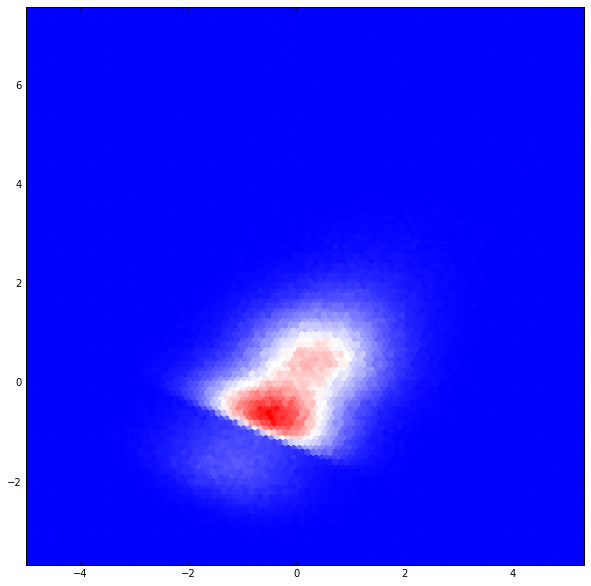

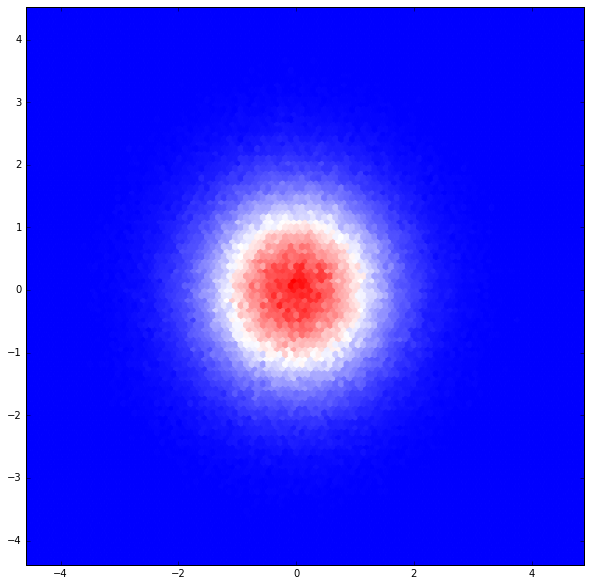

In [5]:
plt.hexbin( xrot[:,0,0], xrot[:,0,1] )
plt.show()


plt.hexbin( z[:,0,0], z[:,0,1] )
plt.show()

#plt.hist( xrot[:,0] )
#plt.show()

#plt.hist( xrot[:,1] )
#plt.show()


#plotting.plot_hists(x_transform.ravel(),z.ravel())#,range=[-4,10])

In [6]:
# plt.scatter( c_test.ravel(), x_test.ravel() )
# plt.show()
# plt.scatter( c_test.ravel(), z_test.ravel() )
# plt.show()


In [7]:
# p = 0
# c_test[p,0],x_test[p,0]-z_test[p,0]

In [8]:
reload(models)

gan = models.MyFFGAN( (1,2), (1,2), # c_shape=(1,1),
                     g_opts=dict(name="G_32x3_64x3_128x3",kernel_sizes=[128]*3+[64]*3+[32]*3,#kernel_sizes=[128]*11,
#                                 do_nl_activ=[False,"tanh"]*3+[False],
#                                 do_poly=True,
#                                 do_nl_activ="relu",do_skip=False, do_bn=True
                                ),
                     d_opts=dict(name="D_512x5_tanh",kernel_sizes=[512]*5),
#                     dm_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
#                     am_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
                      dm_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0001, decay=6e-6)),
                      am_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0001, decay=6e-6)),

                    )

In [9]:
gan.get_generator()

(1, 2)


In [10]:
gan.get_discriminator()

In [11]:
gan.compile()

(<keras.engine.training.Model at 0x7f881d619f50>,
 <keras.engine.training.Model at 0x7f881d7aaa10>)

In [12]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_32x3_64x3_128x3_input (InputLa (None, 1, 2)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_dense (Den (None, 1, 32)         96          G_32x3_64x3_128x3_input[0][0]    
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_activ (PRe (None, 1, 32)         32          G_32x3_64x3_128x3_up1_dense[0][0]
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up2_dense (Den (None, 1, 32)         1056        G_32x3_64x3_128x3_up1_activ[0][0]
___________________________________________________________________________________________

In [13]:
gan.get_discriminator().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_512x5_tanh_input (InputLay (None, 1, 2)              0         
_________________________________________________________________
D_512x5_tanh_down1_dense (De (None, 1, 512)            1536      
_________________________________________________________________
D_512x5_tanh_down1_activ (Ac (None, 1, 512)            0         
_________________________________________________________________
D_512x5_tanh_down2_dense (De (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_tanh_down2_activ (Ac (None, 1, 512)            0         
_________________________________________________________________
D_512x5_tanh_down3_dense (De (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_tanh_down3_activ (Ac (None, 1, 512)            0         
__________

In [14]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_32x3_64x3_128x3_input (InputLa (None, 1, 2)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_dense (Den (None, 1, 32)         96          G_32x3_64x3_128x3_input[0][0]    
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_activ (PRe (None, 1, 32)         32          G_32x3_64x3_128x3_up1_dense[0][0]
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up2_dense (Den (None, 1, 32)         1056        G_32x3_64x3_128x3_up1_activ[0][0]
___________________________________________________________________________________________

In [15]:
gan.dm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_512x5_tanh_input (InputLay (None, 1, 2)              0         
_________________________________________________________________
D_512x5_tanh_down1_dense (De (None, 1, 512)            1536      
_________________________________________________________________
D_512x5_tanh_down1_activ (Ac (None, 1, 512)            0         
_________________________________________________________________
D_512x5_tanh_down2_dense (De (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_tanh_down2_activ (Ac (None, 1, 512)            0         
_________________________________________________________________
D_512x5_tanh_down3_dense (De (None, 1, 512)            262656    
_________________________________________________________________
D_512x5_tanh_down3_activ (Ac (None, 1, 512)            0         
__________

In [16]:
# import toy_datasets as toys

In [17]:
# reload(toys)

x_train,x_test,z_train,z_test = toys.train_test_split(x,z)

print(x_train.shape,z_train.shape)

((375000, 1, 2), (375000, 1, 2))


In [18]:
# plotting.plot_hists(x_train.ravel(),z_train.ravel())

In [19]:
# reload(toys)

# x,z = toys.three_peaks(100000)

# plotting.plot_hists(x.ravel(),z.ravel())

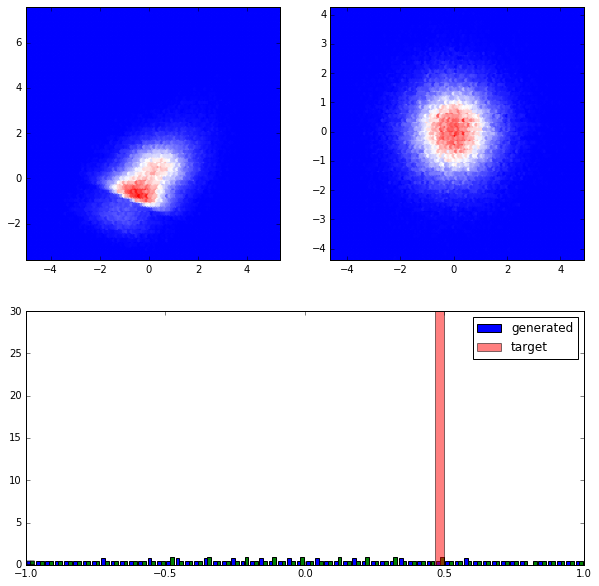

0: D [0.692998 0.500000] A: [0.692054 0.467041]


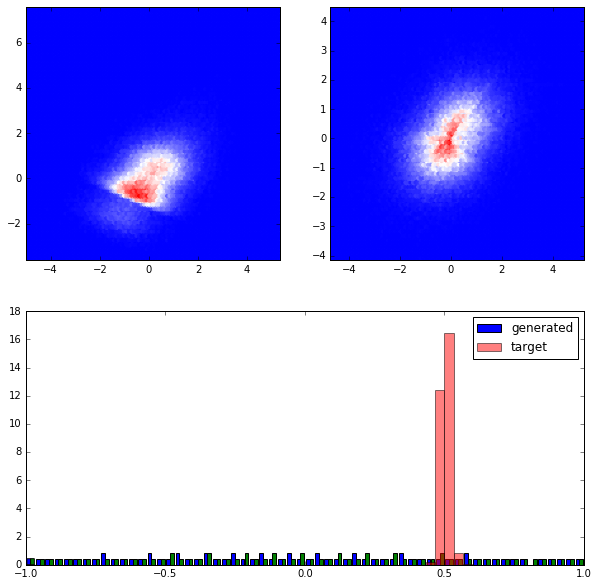

0: D [0.692272 0.518066] A: [0.691985 0.501465]


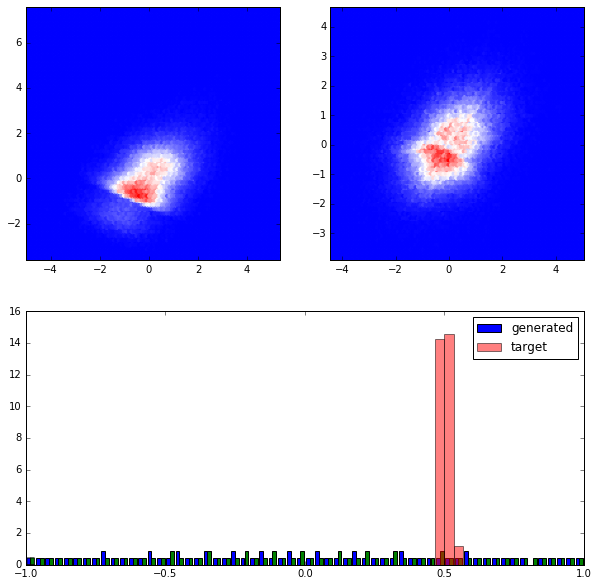

0: D [0.691574 0.516968] A: [0.687960 0.538086]


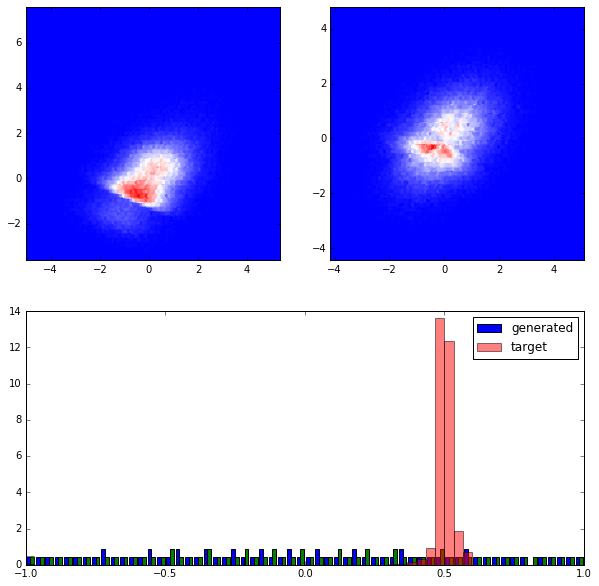

0: D [0.690420 0.519409] A: [0.701065 0.470215]


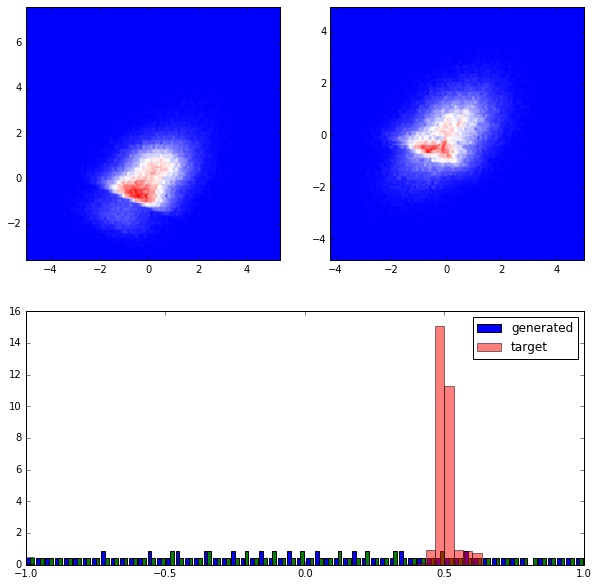

0: D [0.690624 0.514648] A: [0.692078 0.626709]


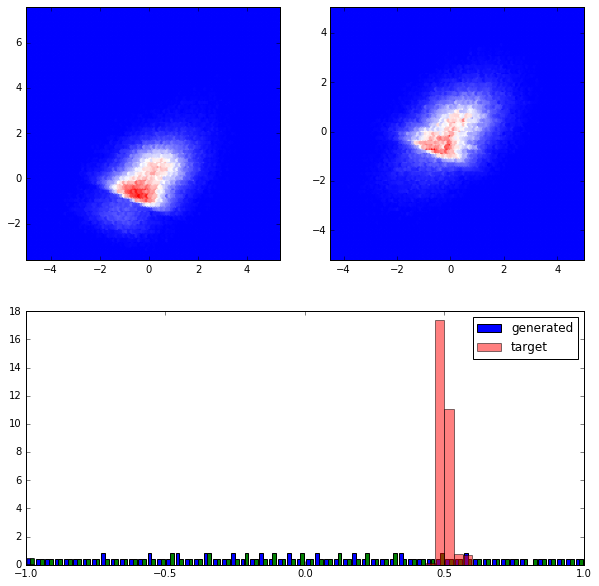

0: D [0.691850 0.513062] A: [0.695524 0.540527]


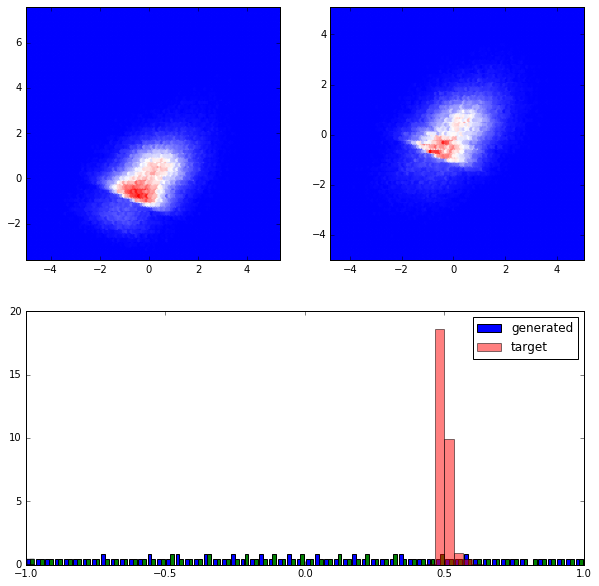

0: D [0.692065 0.501587] A: [0.694656 0.528564]


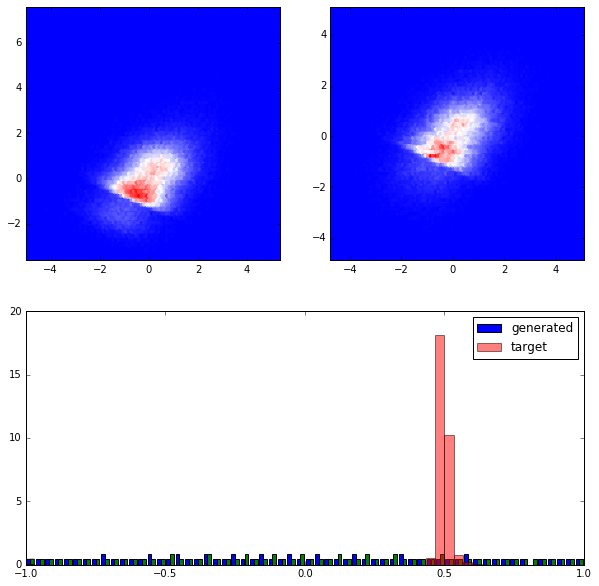

0: D [0.691814 0.510742] A: [0.697382 0.552490]


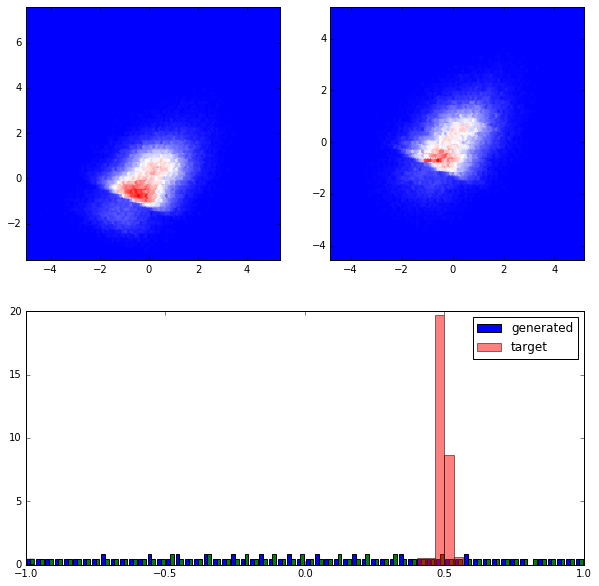

0: D [0.692297 0.505981] A: [0.698875 0.435303]


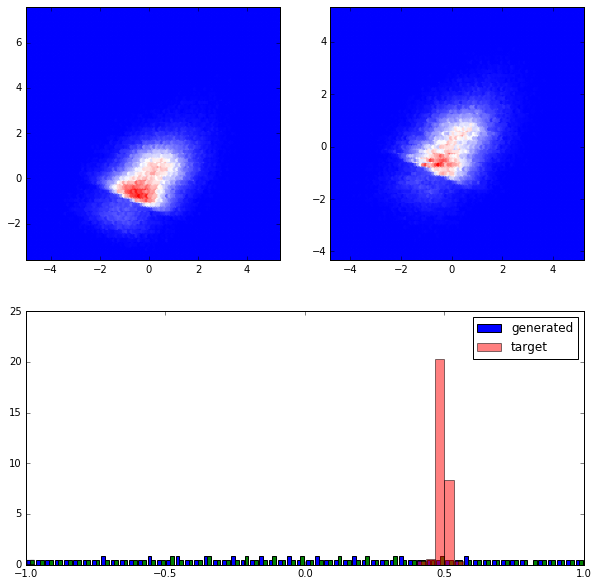

0: D [0.692691 0.505249] A: [0.696939 0.410156]


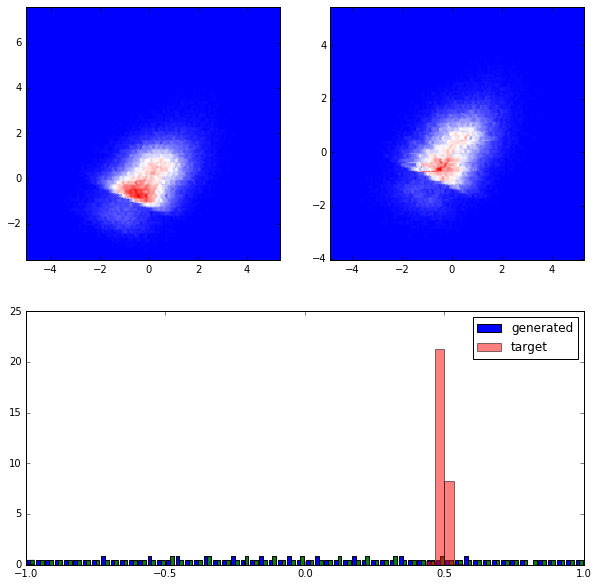

0: D [0.692925 0.503174] A: [0.694888 0.476318]


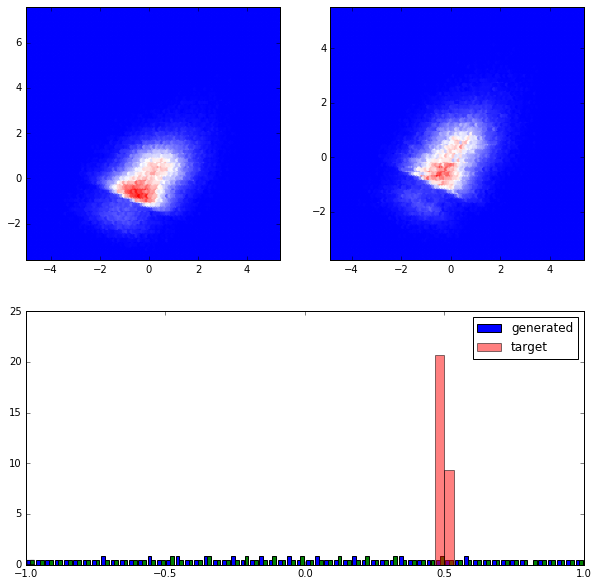

0: D [0.692997 0.505737] A: [0.695242 0.438232]


KeyboardInterrupt: 

In [20]:
probs = np.arange(1,100,1)
cdf_x = np.percentile(x_train,probs)
cdf_z = np.percentile(z_train,probs)


do = dict(x_train=x_train,z_train=z_train,
        x_test=x_test,z_test=z_test,
        n_disc_steps=1,n_gen_steps=1,
        n_epochs=20,solution=(cdf_x,cdf_z),plot_every=1,batch_size=4096)

gan.fit(**do)

# do.update(dict(n_disc_steps=2))
# gan.fit(**do)

# do.update(dict(n_disc_steps=3))
# gan.fit(**do)

# do.update(dict(n_disc_steps=5))
# gan.fit(**do)

In [ ]:
# c0 = np.random.uniform(-1,1,x.shape)+np.random.normal(0,0.1,x.shape)
# c0 -= c0.mean()
# c0 /= c0.std()

# z = toys.white_source(x.shape[0])
# z,_ = toys.two_peaks(x.shape[0],split=False)


# g_train = gan.get_generator().predict( [c_train,z] )[1]
# g_test = gan.get_generator().predict( [c_test,z_test] )[1]
# g_test_unique = np.unique(g_test)
# z_test_unique = np.unique(z_test)
# g_test.sort()
# z_test_unique.sort()

In [ ]:
# g_quantiles = np.percentile(g,probs_test)
# x_quantiles = np.percentile(x_train,probs_test)

In [ ]:
# plt.scatter(z_test_unique,g_quantiles-z_test_unique)
# plt.scatter(z_test_unique,g_test_unique-z_test_unique)
# plt.scatter(z_test_unique,x_quantiles-z_test_unique,color='red')

In [ ]:
# plt.scatter(z_test,g_test-z_test)
# plt.scatter(z_test,x_test-z_test,color='red')

In [ ]:
# g_quantiles - g_test

In [ ]:
target = np.hstack( [c_train.reshape(-1,1), x_train.reshape(-1,1)] )
generated = np.hstack( [c_train.reshape(-1,1), g_train.reshape(-1,1)] )


In [ ]:
plt.hexbin( c_train.ravel(), x_train.ravel() )
plt.show()

plt.hexbin( c_train.ravel(), g_train.ravel() )
plt.show()


In [ ]:
probs2 = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
c_quantiles = np.percentile(np.vstack([generated[:,0],target[:,0]]),probs2)

print(c_quantiles)

In [ ]:
plotting.plot_hists(target[:,1],generated[:,1])
plt.show()

for iqt in range(c_quantiles.shape[0]-1):
    q0 = c_quantiles[iqt]
    q1 = c_quantiles[iqt+1]
    target_slice = target[:,1][(target[:,0]>q0) & (target[:,0]<=q1)] 
    generated_slice = generated[:,1][(generated[:,0]>q0) & (generated[:,0]<=q1)]
    
    print(q0, q1, target_slice.sum(), generated_slice.sum() )
    #target_q = np.percentile( [ target_slice ] , probs2  )
    #generated_q = np.percentile( [ generated_slice ], probs2  )
    
    #plt.plot(target_q,generated_q-target_q,label='%d' % probs2[iqt+1])

    plotting.plot_hists(target_slice,generated_slice)
    plt.show()
#plt.legend()
#plt.show()

In [ ]:
gan.am.output